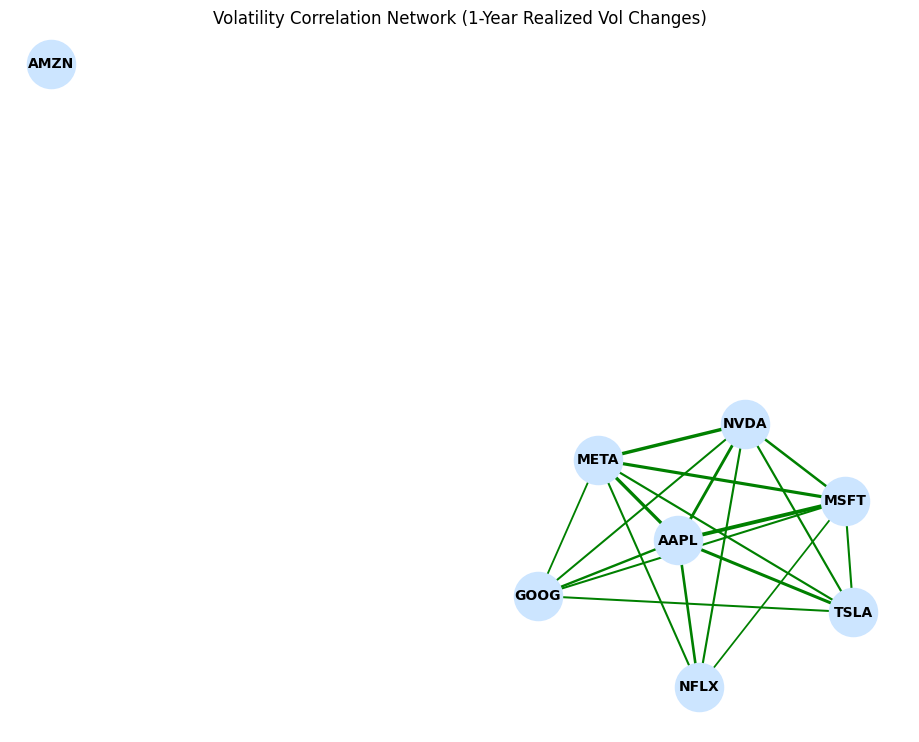

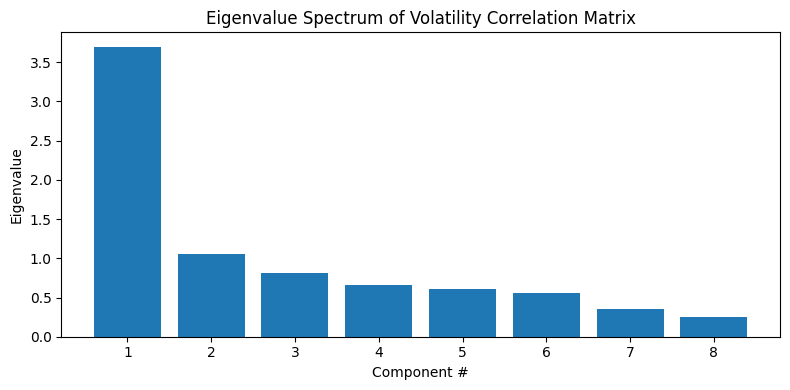

Ticker  AAPL  AMZN  GOOG  META  MSFT  NFLX  NVDA  TSLA
Ticker                                                
AAPL    1.00  0.69  0.43  0.59  0.52  0.21  0.55  0.47
AMZN    0.69  1.00  0.37  0.57  0.45  0.11  0.37  0.32
GOOG    0.43  0.37  1.00  0.33  0.37  0.03  0.36  0.13
META    0.59  0.57  0.33  1.00  0.61  0.19  0.39  0.37
MSFT    0.52  0.45  0.37  0.61  1.00  0.28  0.39  0.39
NFLX    0.21  0.11  0.03  0.19  0.28  1.00  0.19  0.21
NVDA    0.55  0.37  0.36  0.39  0.39  0.19  1.00  0.25
TSLA    0.47  0.32  0.13  0.37  0.39  0.21  0.25  1.00


In [2]:
# Step 14 — Volatility and Correlation Network
import numpy as np, pandas as pd, matplotlib.pyplot as plt, networkx as nx, yfinance as yf

tickers = ["AAPL","MSFT","GOOG","META","NVDA","AMZN","TSLA","NFLX"]
period = "1y"; interval = "1d"

def realized_vol(series, window=20):
    returns = np.log(series/series.shift(1))
    vol = returns.rolling(window).std() * np.sqrt(252)
    return vol

# 1. Download prices & compute realized vol
data = yf.download(tickers, period=period, interval=interval, auto_adjust=True, progress=False)["Close"]
vol_df = data.apply(realized_vol)
vol_df = vol_df.dropna()

# 2. Compute daily vol change correlations
delta_vol = vol_df.diff().dropna()
corr = delta_vol.corr()

# 3. Build correlation network
G = nx.Graph()
for t in tickers:
    G.add_node(t)
for i in range(len(tickers)):
    for j in range(i+1,len(tickers)):
        r = corr.iloc[i,j]
        if abs(r) > 0.3:  # threshold for clarity
            G.add_edge(tickers[i], tickers[j], weight=abs(r), sign=np.sign(r))

# 4. Draw network
plt.figure(figsize=(9,7))
pos = nx.spring_layout(G, seed=42, k=0.8)
edges = G.edges(data=True)
colors = ['red' if e[2]['sign']<0 else 'green' for e in edges]
widths = [4*e[2]['weight'] for e in edges]
nx.draw(G,pos,with_labels=True,node_size=1200,node_color="#CCE5FF",
        edge_color=colors,width=widths,font_size=10,font_weight="bold")
plt.title("Volatility Correlation Network (1-Year Realized Vol Changes)")
plt.show()

# 5. Eigen decomposition for systemic clustering
vals, vecs = np.linalg.eig(corr)
plt.figure(figsize=(8,4))
plt.bar(range(1,len(vals)+1),sorted(vals,reverse=True))
plt.title("Eigenvalue Spectrum of Volatility Correlation Matrix")
plt.xlabel("Component #"); plt.ylabel("Eigenvalue")
plt.tight_layout(); plt.show()

# 6. Export correlation matrix
corr.to_csv(r"C:\Users\adity\Downloads\Learn_DSA_Quant\Level-14\vol_correlation_matrix.csv")

print(corr.round(2))
